# Stackoverflow Question Quality Classifier

### import packages

In [1]:
import pandas as pd
import tqdm
from tqdm import tqdm
import regex as re 
import spacy
nlp = spacy.load("en_core_web_lg")

### Goal

My goal with this Machine Learning Model is to classify Stackoverflow Questions into High-Quality(HQ), Low-Quality-Edited(LQ_EDIT), and Low-Quality-Closed(LQ_CLOSE). This classification model could be used by Stackoverflow

### Data Exploration

In [2]:
df = pd.read_csv('./data/data.csv')
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [3]:
df.shape

(60000, 6)

In [4]:
df.isnull().sum()

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64

In [5]:
df['Y'].value_counts(normalize=True)

HQ          0.333333
LQ_EDIT     0.333333
LQ_CLOSE    0.333333
Name: Y, dtype: float64

In [6]:
df.columns = [col.lower() for col in df.columns]
df['description'] = df['title'] +' '+ df['body']
df.head()

,id,title,body,tags,creationdate,y,description
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,Java: Repeat Task Every Random Seconds <p>I'm ...
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,How to get all the child records from differen...
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,Why are Java Optionals immutable? <p>I'd like ...
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,Text Overlay Image with Darkened Opacity React...
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,Why ternary operator in swift is so picky? <p>...


### Tokenize, Remove Stop words, and Punct

Before vectorizing the Movies descriptions, I had to apply two preprocessing steps to lowercase and remove whitespace. I also combined the 'listed_in' and 'description' columns. Then I used Spacy's pretrained NLP model (en_core_web_lg) to lemmatize, remove stop words, and punctuations.

In [7]:
df = df.iloc[:12000]

In [8]:
def token_clean(doc_list):
    #Extract tokens from reviews using Spacy
    # nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

    other_words = []

    tokens = []

    for document in tqdm(doc_list):
        doc = re.sub("[^a-zA-Z]+"," ",str(document))
        doc = doc.lower().strip()
        doc = nlp(doc)
        doc = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (str(token) not in other_words) and (str(token).isdigit() != True) and (len(str(token)) >1)]
        tokens.append(doc)
        
    return tokens
    

In [9]:
list1 = []
string1 = 'hello'
list1.append(string1)
list1.append(string1)
list1

['hello', 'hello']

In [10]:
def str_clean(string):
    #Extract tokens from reviews using Spacy
    # nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

    other_words = []

    tokens = []

    string = re.sub("[^a-zA-Z]+"," ",string)
    string = string.lower().strip()
    string = nlp(string)
    string = [token.lemma_ for token in string if (token.is_stop != True) and (token.is_punct != True) and (str(token) not in other_words) and (str(token).isdigit() != True) and (len(str(token)) >1)]
    tokens.append(string)
        
    return tokens
    

In [11]:
df['tokens'] = token_clean(df['description'])

100%|██████████| 12000/12000 [20:42<00:00,  9.66it/s] 


In [12]:
df.head()

,id,title,body,tags,creationdate,y,description,tokens
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,Java: Repeat Task Every Random Seconds <p>I'm ...,"[java, repeat, task, random, second, familiar,..."
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,How to get all the child records from differen...,"[child, record, different, table, base, give, ..."
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,Why are Java Optionals immutable? <p>I'd like ...,"[java, optional, immutable, like, understand, ..."
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,Text Overlay Image with Darkened Opacity React...,"[text, overlay, image, darkened, opacity, reac..."
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,Why ternary operator in swift is so picky? <p>...,"[ternary, operator, swift, picky, question, si..."


In [44]:
df['body'][1]

"<p>I'm running on a MacBook Air.  I installed MS Code as an IDE and also have TypeScript installed.</p>\n\n<p>I have a simple file with just this line:</p>\n\n<pre><code>import fs = require('fs');\n</code></pre>\n\n<p>I'm getting a red squiggly under the 'fs' inside the parenthesis and the error message is <code>[ts] Cannot find module 'fs'.</code> The file has a .ts extension. I'm new to JavaScript and to TypeScript, but I was under the impression that <code>fs</code> was a core module, so how could it not be found?  How do I fix the problem?</p>\n\n<p>Other things that I tried already:</p>\n\n<ul>\n<li>Putting a simple function body in the file and then compiling on the command line with <code>tsc</code>.  I get an essentially equivalent error there: <code>error TS2307: Cannot find module 'fs'.</code>  </li>\n<li>On the command line <code>sudo npm install fs -g</code>.  This reports apparent success, but doesn't fix the problem.</li>\n</ul>\n\n<p>I poked around SE and the web, but t

In [14]:
df['tokens'][5]

['hide',
 'fab',
 'scale',
 'animation',
 'custom',
 'floatingactionmenu',
 'need',
 'implement',
 'scale',
 'animation',
 'hide',
 'menu',
 'button',
 'like',
 'href',
 'https',
 'material',
 'design',
 'storage',
 'googleapi',
 'com',
 'publish',
 'material',
 'material',
 'ext',
 'publish',
 'okdz',
 'tqqszu',
 'kzwhrywzpudg',
 'component',
 'button',
 'fab',
 'behavior',
 'xhdpi',
 'mp',
 'rel',
 'noreferrer',
 'float',
 'action',
 'button',
 'behaviour',
 'way']

In [15]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

In [16]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [17]:
wc = count(df['tokens'])

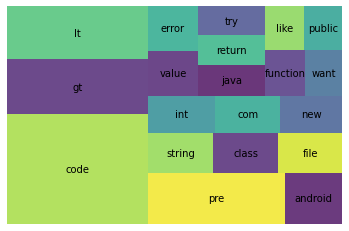

In [18]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Here I plotted the top 20 most frequent words in the corpus.

### Vectorize Tokens (TFIDF)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),
                      max_df=0.97,
                      min_df=2)

description = df['tokens'].astype(str)

dtm = tfidf.fit_transform(description)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,aa,aa aa,aa amp,aa bb,aa code,aa date,aa new,aa setdropdownviewresource,aa want,aaa,...,zygoteinit main,zygoteinit methodandargscaller,zz,zza,zza unknown,zzb,zzo,zzo unknown,zzz,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### RandomForestClassifier

In [25]:
df['tokens']= df['tokens'].astype(str)

# Define how much percent data you wanna split
split_pcent = 0.20
split = int(split_pcent * len(df))

# Shuffles dataframe
df = df.sample(frac=1).reset_index(drop=True)

feature = "tokens"
target = "y"

In [35]:
# Training Sets
train = df[split:]
X_train = train[feature]
y_train = train[target]

# Validation Sets
valid = df[:split]
X_valid = valid[feature]
y_valid = valid[target]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, algorithm='randomized',n_iter=10)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [27]:
params = {
    'lsi__svd__n_components': [100,500,1000],
    'lsi__vect__min_df':[.02,.05],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'lsi__vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__n_estimators':[300,500,1000]}

In [28]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])


# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [29]:
# Fit
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
/Users/ashleyadrias/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('lsi',
                                              Pipeline(steps=[('vect',
                                                               TfidfVectorizer(ngram_range=(1,
                                                                                            2),
                                                                               stop_words='english')),
                                                              ('svd',
                                                               TruncatedSVD(n_components=1000,
                                                                            n_iter=10))])),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__n_estimators': [300, 500, 1000],
                                        'lsi__svd__n_components

In [30]:
grid_search.best_score_

0.6892708333333333

In [31]:
grid_search.best_params_

{'lsi__vect__ngram_range': (1, 3),
 'lsi__vect__min_df': 0.05,
 'lsi__vect__max_df': 0.9,
 'lsi__svd__n_components': 100,
 'clf__n_estimators': 500}

### Evaluation: classification report & confusion matrix

In [36]:
pipeline = grid_search.best_estimator_

In [37]:
y_pred = pipeline.predict(X_valid)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

          HQ       0.70      0.77      0.73       891
    LQ_CLOSE       0.66      0.51      0.57       811
     LQ_EDIT       0.72      0.82      0.77       698

    accuracy                           0.70      2400
   macro avg       0.69      0.70      0.69      2400
weighted avg       0.69      0.70      0.69      2400



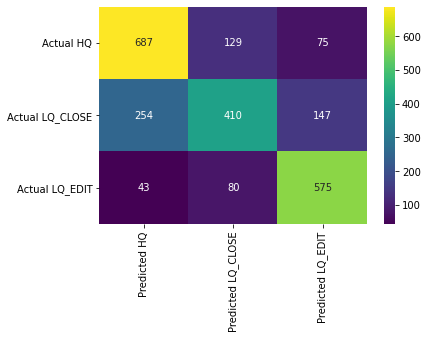

In [39]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_valid, y_pred);

### Export model

In [40]:
# 1 pickle file is to big for heroku and github
# import pickle

filename = 'pipe_01.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [ ]:
# import pickle

# filename = 'vect_01.pkl'
# pickle.dump(tfidf, open(filename, 'wb'))

# filename = 'knn_01.pkl'
# pickle.dump(nn, open(filename, 'wb'))